In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Start with an array that is the red channel of an image of the moon

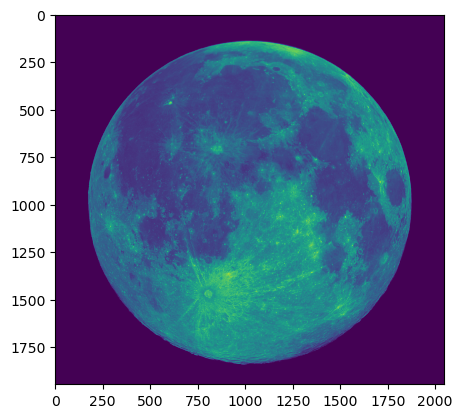

In [2]:
image = Image.open('moon.jpeg')
image_array = np.array(image)[:,:,0]
plt.imshow(image_array);

## There are almost 4 million values in this array (1946 x 2048)

In [3]:
image_array.shape, image_array.size

((1946, 2048), 3985408)

# Decompose this array into two arrays, A and B, which are much smaller and, whose dot product reconstructs the original array

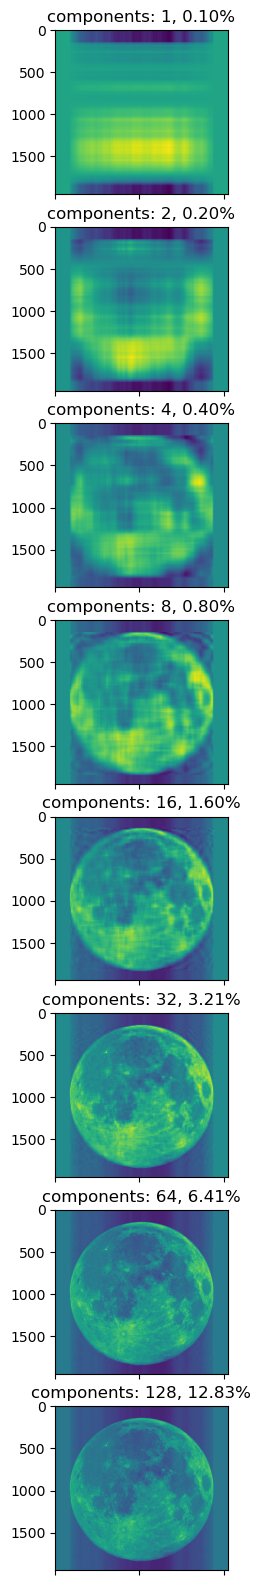

In [4]:
N = (1,2,4,8,16,32,64, 128)
for n, ax in zip(N, plt.subplots(len(N), figsize=(10,20))[1]):
    pca = PCA(n_components=n).fit(image_array)
    A = pca.transform(image_array)
    B = pca.components_
    reconstruction = A@B
    ax.imshow(reconstruction)
    ax.set_title(f'components: {n}, {100*(A.size + B.size)/image_array.size:.2f}%')
    ax.set_xticklabels('')

## When the number of components is about 32, nearly all of the useful information is retained and the total number of values in the arrays is about 3.2% of the original array.